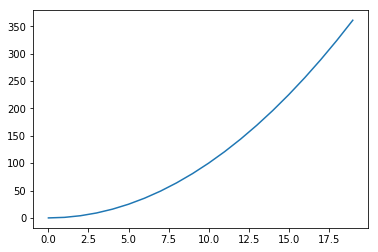

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = x**2

plt.plot(x, y)

In [ ]:
#不使用with 语句 ，会使用默认的tensorflow 的图
import tensorflow as tf
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul( matrix2,matrix1)
sess = tf.Session()
result = sess.run(product)
print (result)
sess.close()


In [15]:
#采用with 语句的例子，启动非默认的图
import tensorflow as tf
a=tf.Variable([1,2,3])
b=tf.Variable([1,2,3])
c=tf.Variable([0,0,0])
d=tf.Variable([1,0,1])
op_add=tf.add(a,b)
# print (c.eval())
init_op = tf.global_variables_initializer()#必须有个全局变量初始化,因为这里存在变量了
with tf.Session() as se:
    se.run(init_op)#运行初始化
    out=se.run(op_add)
    print(out)
    for _ in range(3):
        se.run(tf.assign_add(c,d))
    print(c.eval())#使用eval()函数查看数值，注意eval()函数的生存周期为在sessin中



[2 4 6]
[3 0 3]


In [16]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)

with tf.Session() as sess:#这里不存在tf.global_variables_initializer()是因为这里全是常量
  result = sess.run([mul, intermed])
  chageOrder=sess.run([ intermed,mul])#前后顺序似乎不是关键
  print (result)
  print (chageOrder)

[21.0, 7.0]
[7.0, 21.0]


In [1]:
import  tensorflow as tf
input1=tf.placeholder(tf.float32,shape=(2,1))
input2=tf.placeholder(tf.float32,shape=(1,2))
op_mul=tf.multiply(input1,input2)#对应位置相乘，否则广播
op_mulmat=tf.matmul(input1,input2)#矩阵乘法
realinput1=[[1],[2]]
realinput2=[[1,2,]]
with tf.Session() as sess:
    result=sess.run([op_mul],feed_dict={input1:realinput1,input2:realinput2})
    result2=sess.run([op_mulmat],feed_dict={input1:realinput1,input2:realinput2})
    print (result)
    print (result2)
  

[array([[1., 2.],
       [2., 4.]], dtype=float32)]
[array([[1., 2.],
       [2., 4.]], dtype=float32)]


In [1]:

import  tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)
x = tf.placeholder("float", [None, 784])#输入图像
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))#使用交叉熵
train_step=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)#使用梯度下降
init=tf.global_variables_initializer()#全局变量初始化
sess = tf.Session()#开启图
sess.run(init)
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)#图像和标签，该循环中每步选取100个数据
    sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})
    print(">"*(i//100),i)
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))#进行评估
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))#转换数据类型
print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

    
    


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.


Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)
Instructions for updating:
Colocations handled automatically by placer.


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,10]
	 [[node Placeholder_1 (defined at <ipython-input-1-23ef619d3366>:15) ]]

Caused by op 'Placeholder_1', defined at:
  File "C:\fivesmallrain\PYTHON\python35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\fivesmallrain\PYTHON\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\fivesmallrain\PYTHON\python35\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "C:\fivesmallrain\PYTHON\python35\lib\asyncio\base_events.py", line 1424, in _run_once
    handle._run()
  File "C:\fivesmallrain\PYTHON\python35\lib\asyncio\events.py", line 126, in _run
    self._callback(*self._args)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 708, in __init__
    self.run()
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2705, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2809, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2869, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-23ef619d3366>", line 15, in <module>
    y_ = tf.placeholder("float", [None,10])
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6833, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\fivesmallrain\PYTHON\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,10]
	 [[node Placeholder_1 (defined at <ipython-input-1-23ef619d3366>:15) ]]
